In [139]:
import yfinance as yf

In [140]:
msft = yf.Ticker("MSFT")
msft = msft.history(period="max")

In [141]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

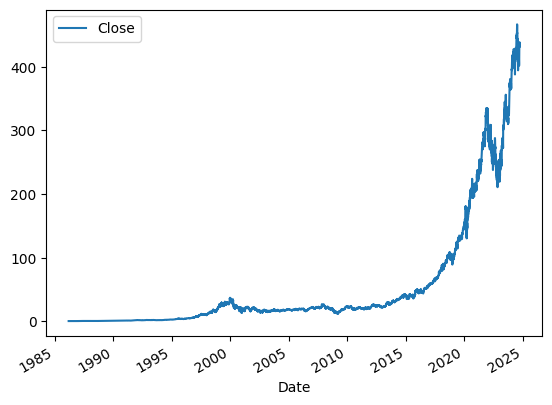

In [142]:
msft.plot(use_index="True", y="Close") #use_index uses the time series data automatic indexer, which is the date

In [143]:
import pandas as pd
del msft["Dividends"]
del msft["Stock Splits"]
msft

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13 00:00:00-05:00,0.054594,0.062623,0.054594,0.059946,1031788800
1986-03-14 00:00:00-05:00,0.059947,0.063158,0.059947,0.062087,308160000
1986-03-17 00:00:00-05:00,0.062087,0.063694,0.062087,0.063158,133171200
1986-03-18 00:00:00-05:00,0.063158,0.063694,0.061017,0.061552,67766400
1986-03-19 00:00:00-05:00,0.061552,0.062087,0.059946,0.060482,47894400
...,...,...,...,...,...
2024-09-16 00:00:00-04:00,430.600006,433.529999,428.220001,431.339996,13834700
2024-09-17 00:00:00-04:00,440.230011,441.850006,432.269989,435.149994,18874200
2024-09-18 00:00:00-04:00,435.000000,436.029999,430.410004,430.809998,18898000


In [144]:
#Setting up to allow for model to predicto solely whether the stock went UP or DOWN.
msft["Tomorrow"] = msft["Close"].shift(-1)
msft["Target"] = (msft["Tomorrow"] > msft["Close"]).astype(int)
msft

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054594,0.062623,0.054594,0.059946,1031788800,0.062087,1
1986-03-14 00:00:00-05:00,0.059947,0.063158,0.059947,0.062087,308160000,0.063158,1
1986-03-17 00:00:00-05:00,0.062087,0.063694,0.062087,0.063158,133171200,0.061552,0
1986-03-18 00:00:00-05:00,0.063158,0.063694,0.061017,0.061552,67766400,0.060482,0
1986-03-19 00:00:00-05:00,0.061552,0.062087,0.059946,0.060482,47894400,0.058876,0
...,...,...,...,...,...,...,...
2024-09-16 00:00:00-04:00,430.600006,433.529999,428.220001,431.339996,13834700,435.149994,1
2024-09-17 00:00:00-04:00,440.230011,441.850006,432.269989,435.149994,18874200,430.809998,0
2024-09-18 00:00:00-04:00,435.000000,436.029999,430.410004,430.809998,18898000,438.690002,1


In [145]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

train = msft.iloc[:-100]
test = msft.iloc[-100:]

predictors = ["Open", "High", "Low", "Close", "Volume"]

model.fit(train[predictors], train["Target"])


RandomForestClassifier()

In [146]:
from sklearn.metrics import precision_score

predictions = model.predict(test[predictors])
predictions = pd.Series(predictions, index=test.index) #Convert to series to compare Date (index) to prediction relationship
predictions

Date
2024-04-30 00:00:00-04:00    1
2024-05-01 00:00:00-04:00    1
2024-05-02 00:00:00-04:00    1
2024-05-03 00:00:00-04:00    1
2024-05-06 00:00:00-04:00    0
                            ..
2024-09-16 00:00:00-04:00    0
2024-09-17 00:00:00-04:00    0
2024-09-18 00:00:00-04:00    0
2024-09-19 00:00:00-04:00    0
2024-09-20 00:00:00-04:00    0
Length: 100, dtype: int64

In [147]:
precision_score(test["Target"], predictions)

np.float64(0.5789473684210527)

In [148]:
def predict(train, test, model, predictors):
    model.fit(train[predictors], train["Target"]) #The model learns the patterns of a particular year 
    predictions = model.predict(test[predictors]) #Predicts whether the stock went up or down based on the train set
    predictions = pd.Series(predictions, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], predictions], axis=1)
    return combined

In [149]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, model, predictors)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [150]:
predictions = backtest(msft, model, predictors)

In [151]:
predictions["Predictions"].value_counts()

Predictions
0    4542
1    2667
Name: count, dtype: int64

In [152]:
precision_score(predictions["Target"], predictions["Predictions"])
#While the precision score is lower, it is more realistic than the previous precision score, as it reduced overfitting.

np.float64(0.4956880389951256)